* https://www.1point3acres.com/bbs/thread-579902-1-1.html

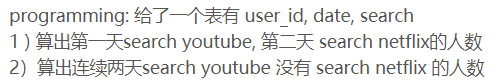

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {
    'user_id' : ['x01', 'x01', 'x01', 'x02', 'x02', 'x03', 'x03', 'x04', 'x04', 'x04'],
    'date' : ['2020-01-01', '2020-01-02', '2020-01-02', '2020-01-02', '2020-01-03', '2020-01-02', '2020-01-03', '2020-01-02', '2020-01-03', '2020-01-03'],
    'search' : ['youtube', 'netflix', 'youtube', 'youtube', 'netflix', 'youtube', 'youtube', 'youtube', 'youtube', 'netflix']
}
  
# creating a Dataframe object 
df = pd.DataFrame(data)
df['date'] = df['date'].astype('datetime64[ns]')
df

,user_id,date,search
0,x01,2020-01-01,youtube
1,x01,2020-01-02,netflix
2,x01,2020-01-02,youtube
3,x02,2020-01-02,youtube
4,x02,2020-01-03,netflix
5,x03,2020-01-02,youtube
6,x03,2020-01-03,youtube
7,x04,2020-01-02,youtube
8,x04,2020-01-03,youtube
9,x04,2020-01-03,netflix


In [3]:
# drop duplicates
df = df.drop_duplicates()
df

,user_id,date,search
0,x01,2020-01-01,youtube
1,x01,2020-01-02,netflix
2,x01,2020-01-02,youtube
3,x02,2020-01-02,youtube
4,x02,2020-01-03,netflix
5,x03,2020-01-02,youtube
6,x03,2020-01-03,youtube
7,x04,2020-01-02,youtube
8,x04,2020-01-03,youtube
9,x04,2020-01-03,netflix


### 1 ) 算出第一天search youtube, 第二天 search netflix的人数

In [4]:
df1 = df[df['search'] == 'youtube'].rename(columns={'date': 'date1', 'search':'search1'})
df2 = df[df['search'] == 'netflix'].rename(columns={'date': 'date2', 'search':'search2'})
merged = pd.merge(df1, df2, how='inner', on=['user_id'])
merged

,user_id,date1,search1,date2,search2
0,x01,2020-01-01,youtube,2020-01-02,netflix
1,x01,2020-01-02,youtube,2020-01-02,netflix
2,x02,2020-01-02,youtube,2020-01-03,netflix
3,x04,2020-01-02,youtube,2020-01-03,netflix
4,x04,2020-01-03,youtube,2020-01-03,netflix


In [5]:
merged['date_diff'] = (merged['date2'] - merged['date1']).dt.days
merged

,user_id,date1,search1,date2,search2,date_diff
0,x01,2020-01-01,youtube,2020-01-02,netflix,1
1,x01,2020-01-02,youtube,2020-01-02,netflix,0
2,x02,2020-01-02,youtube,2020-01-03,netflix,1
3,x04,2020-01-02,youtube,2020-01-03,netflix,1
4,x04,2020-01-03,youtube,2020-01-03,netflix,0


In [6]:
df3 = merged[merged['date_diff']==1]
df3.user_id.nunique()

3

### 2）算出连续两天search youtube 没有 search netflix 的人数
* https://stackoverflow.com/questions/53335567/use-pandas-shift-within-a-group

In [7]:
df

,user_id,date,search
0,x01,2020-01-01,youtube
1,x01,2020-01-02,netflix
2,x01,2020-01-02,youtube
3,x02,2020-01-02,youtube
4,x02,2020-01-03,netflix
5,x03,2020-01-02,youtube
6,x03,2020-01-03,youtube
7,x04,2020-01-02,youtube
8,x04,2020-01-03,youtube
9,x04,2020-01-03,netflix


In [8]:
df10 = df.groupby(['user_id', 'date'])['search'].unique().reset_index()
df10

,user_id,date,search
0,x01,2020-01-01,[youtube]
1,x01,2020-01-02,"[netflix, youtube]"
2,x02,2020-01-02,[youtube]
3,x02,2020-01-03,[netflix]
4,x03,2020-01-02,[youtube]
5,x03,2020-01-03,[youtube]
6,x04,2020-01-02,[youtube]
7,x04,2020-01-03,"[youtube, netflix]"


In [9]:
df10['search'] = df10['search'].astype(str)

In [10]:
df11 = df10[df10['search'].str.contains('youtube') & ~df10['search'].str.contains('netflix')]
df11

,user_id,date,search
0,x01,2020-01-01,['youtube']
2,x02,2020-01-02,['youtube']
4,x03,2020-01-02,['youtube']
5,x03,2020-01-03,['youtube']
6,x04,2020-01-02,['youtube']


In [11]:
# 先找连续两天 search youtube 的

In [12]:
# https://stackoverflow.com/questions/40804265/how-to-calculate-time-difference-by-group-using-pandas
# https://stackoverflow.com/questions/35534152/how-to-calculate-days-difference-between-successive-pandas-dataframe-rows-with

df11['time_shift'] = df11.sort_values(['user_id','date']).groupby(['user_id'])['date'].diff()
df11

<ipython-input-12-8a9ad212c547>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['time_shift'] = df11.sort_values(['user_id','date']).groupby(['user_id'])['date'].diff()


,user_id,date,search,time_shift
0,x01,2020-01-01,['youtube'],NaT
2,x02,2020-01-02,['youtube'],NaT
4,x03,2020-01-02,['youtube'],NaT
5,x03,2020-01-03,['youtube'],1 days
6,x04,2020-01-02,['youtube'],NaT


In [13]:
df12 = df11[df11['time_shift'] == '1 days']
df12

,user_id,date,search,time_shift
5,x03,2020-01-03,['youtube'],1 days


In [14]:
df12.user_id.nunique()

1

### Shift
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [15]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [18]:
df.shift(periods=2)

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,10.0,13.0,17.0
2020-01-04,20.0,23.0,27.0
2020-01-05,15.0,18.0,22.0


In [19]:
df.diff()

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,10.0,10.0,10.0
2020-01-03,-5.0,-5.0,-5.0
2020-01-04,15.0,15.0,15.0
2020-01-05,15.0,15.0,15.0
